In [9]:
from scripts.config import SRC_DIR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train = pd.read_csv(SRC_DIR / "data/internal/train.csv")
transactions = pd.read_csv(SRC_DIR / "data/internal/transactions.csv")
transactions = pd.merge(left=train,
                            right=transactions,
                            how='left',
                            on='msno')
transactions.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,20170115,20170215,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,20161116,20161215,0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,20170215,20170315,0
3,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,20161215,20170115,0
4,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,20170315,20170415,0


In [11]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991121 entries, 0 to 991120
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      991121 non-null  object
 1   is_churn  991121 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.1+ MB


In [12]:
transactions.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16697161 entries, 0 to 16697160
Data columns (total 10 columns):
 #   Column                  Non-Null Count     Dtype 
---  ------                  --------------     ----- 
 0   msno                    16697161 non-null  object
 1   is_churn                16697161 non-null  int64 
 2   payment_method_id       16697161 non-null  int64 
 3   payment_plan_days       16697161 non-null  int64 
 4   plan_list_price         16697161 non-null  int64 
 5   actual_amount_paid      16697161 non-null  int64 
 6   is_auto_renew           16697161 non-null  int64 
 7   transaction_date        16697161 non-null  int64 
 8   membership_expire_date  16697161 non-null  int64 
 9   is_cancel               16697161 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.2+ GB


In [13]:
transactions["msno"].duplicated().sum()
# Tenemos duplicados porque un mismo usuario puede tener multiples transacciones

15706040

In [14]:
transactions.describe() 

,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,1.669716e+07,1.669716e+07,1.669716e+07,1.669716e+07,1.669716e+07,1.669716e+07,1.669716e+07,1.669716e+07,1.669716e+07
mean,3.053184e-02,3.918391e+01,2.999679e+01,1.329657e+02,1.372781e+02,9.234438e-01,2.015927e+07,2.016043e+07,1.707039e-02
std,1.720455e-01,3.344086e+00,1.805689e+01,8.075163e+01,7.772042e+01,2.658861e-01,6.670790e+03,7.243547e+03,1.295337e-01
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,0.000000e+00,3.900000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015111e+07,2.015122e+07,0.000000e+00
50%,0.000000e+00,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016061e+07,2.016072e+07,0.000000e+00
75%,0.000000e+00,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016112e+07,2.016123e+07,0.000000e+00
max,1.000000e+00,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.023082e+07,1.000000e+00


In [15]:
def convert_date(yyyymmdd):
    if pd.isna(yyyymmdd):
        return np.nan
    yyyymmdd_str = str(int(yyyymmdd))  # Convert to integer first to remove decimal part, then back to string
    yyyy = yyyymmdd_str[:4]
    mm = yyyymmdd_str[4:6]
    dd = yyyymmdd_str[6:]
    return f"{yyyy}-{mm}-{dd}"
transactions['transaction_date'] = transactions['transaction_date'].apply(convert_date)
transactions['membership_expire_date'] = transactions['membership_expire_date'].apply(convert_date)
transactions.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,2017-01-15,2017-02-15,0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,2016-11-16,2016-12-15,0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,2017-02-15,2017-03-15,0
3,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,2016-12-15,2017-01-15,0
4,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,41,30,99,99,1,2017-03-15,2017-04-15,0


In [16]:
transactions.duplicated().sum()


2982

In [17]:
# Choose a user KNRlhzy0NLbX2bynEF8VdyvhPrQoippmEiFCAKYUXWw=
transactions_user = (transactions[transactions["msno"] == "KNRlhzy0NLbX2bynEF8VdyvhPrQoippmEiFCAKYUXWw="].sort_values
                     (by="transaction_date"))
transactions_user.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
5841283,KNRlhzy0NLbX2bynEF8VdyvhPrQoippmEiFCAKYUXWw=,0,37,31,149,149,1,2015-01-15,2015-02-15,0
5841296,KNRlhzy0NLbX2bynEF8VdyvhPrQoippmEiFCAKYUXWw=,0,37,31,149,149,1,2015-02-15,2015-03-15,0
5841284,KNRlhzy0NLbX2bynEF8VdyvhPrQoippmEiFCAKYUXWw=,0,37,31,149,149,1,2015-03-15,2015-04-15,0
5841303,KNRlhzy0NLbX2bynEF8VdyvhPrQoippmEiFCAKYUXWw=,0,37,31,149,149,1,2015-04-16,2015-05-15,0
5841289,KNRlhzy0NLbX2bynEF8VdyvhPrQoippmEiFCAKYUXWw=,0,37,31,149,149,1,2015-05-16,2015-06-15,0


In [18]:
transactions.drop_duplicates(inplace=True)

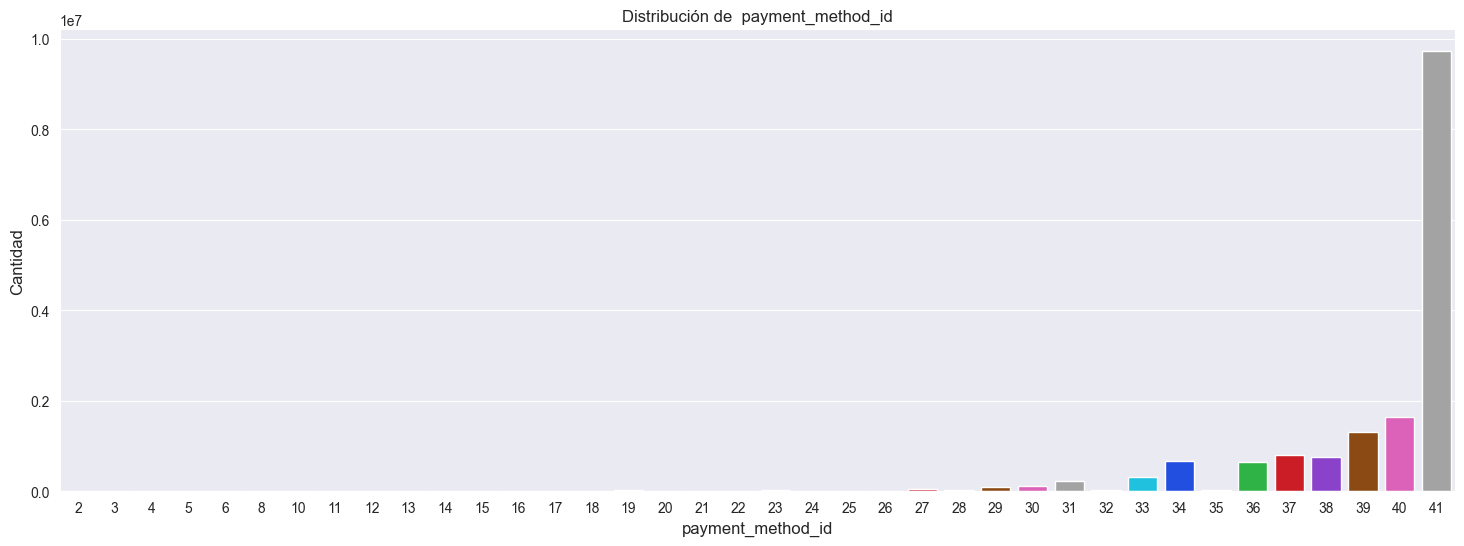

In [19]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="payment_method_id", data=transactions, hue="payment_method_id", legend=False, palette="bright")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('payment_method_id', fontsize=12)
plt.title("Distribución de  payment_method_id", fontsize=12)
plt.show()

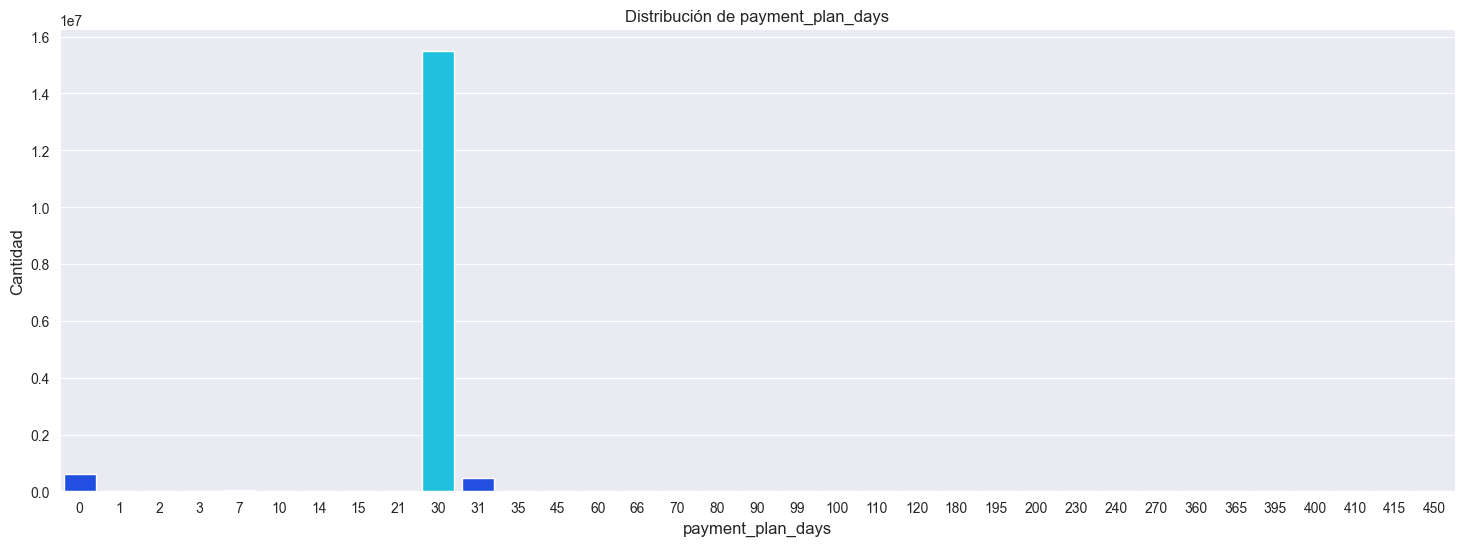

In [20]:
# payment_plan_days count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="payment_plan_days", data=transactions, hue="payment_plan_days", legend=False, palette="bright")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('payment_plan_days', fontsize=12)
plt.title("Distribución de payment_plan_days", fontsize=12)
plt.show()


In [29]:
transactions_big = transactions[transactions["payment_plan_days"] == 450]
transactions_big.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
36618,+6qrBtyu4oqE+pKhtYxlb7NKL6H7H+nxDW/XlCDmcJk=,1,38,450,1788,1788,0,2015-12-26,2017-03-27,0
177267,+eyHXyFpdTdZPaXB4/2M76ZjSrg2Xd6AGyHHS4aNZKI=,1,38,450,1788,1788,0,2015-12-07,2017-03-08,0
216560,+odHBfQ3qWapfREmv9Cud4XRHT+M/RJfGNK3Cm+OUOg=,0,38,450,1788,1788,0,2017-03-09,2018-06-02,0
239273,+uS8xK5NL+hw7ZR7lhT4BlJpz6exteglESVWgojKvDo=,0,38,450,1788,1788,0,2017-03-13,2018-06-06,0
264236,/+NEUk1t2vBJTxt1yz82wxMtWU3D5WUxnIHrsVTuwf0=,1,38,450,1788,1788,0,2015-12-26,2017-03-23,0


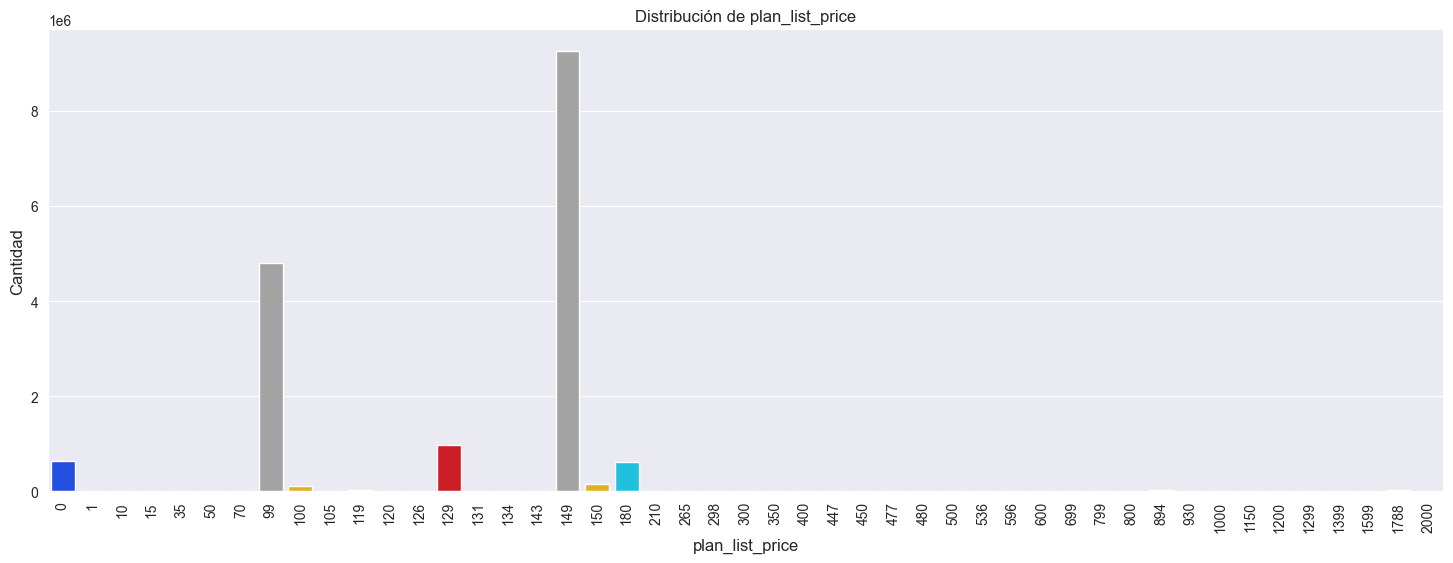

In [21]:
# plan_list_price count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="plan_list_price", data=transactions, hue="plan_list_price", legend=False, palette="bright")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('plan_list_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de plan_list_price", fontsize=12)
plt.show()

In [30]:
transactions_big_payment = transactions[transactions["plan_list_price"] == 2000]
transactions_big_payment.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
83809,+IGweoUAazniScHYhNM1724fzAw2PR3FeWyyOppJeKc=,0,28,400,2000,2000,0,2015-10-29,2016-12-17,0
111209,+P1cFdJOenQT1doy3V43M9ZfYl8guSL5MMvkoVcYEYQ=,0,28,400,2000,2000,0,2015-10-05,2016-11-08,0
325061,/CbY8YdWcx9wmPHxiIqM3r5EmZWyJxhW1FSpW0qoieI=,1,28,400,2000,2000,0,2016-02-02,2017-03-08,0
905215,1QXS0A6GVu+k5jdIAirZ5mTZogsSqFKhSfezLPrWY1s=,0,28,400,2000,2000,0,2016-01-01,2017-03-25,0
1246205,2l5y/JIBOOy6cHUwgFx0C6osB4KSbNqWM1j0Jeopn1M=,1,28,400,2000,2000,0,2016-01-03,2017-02-09,0


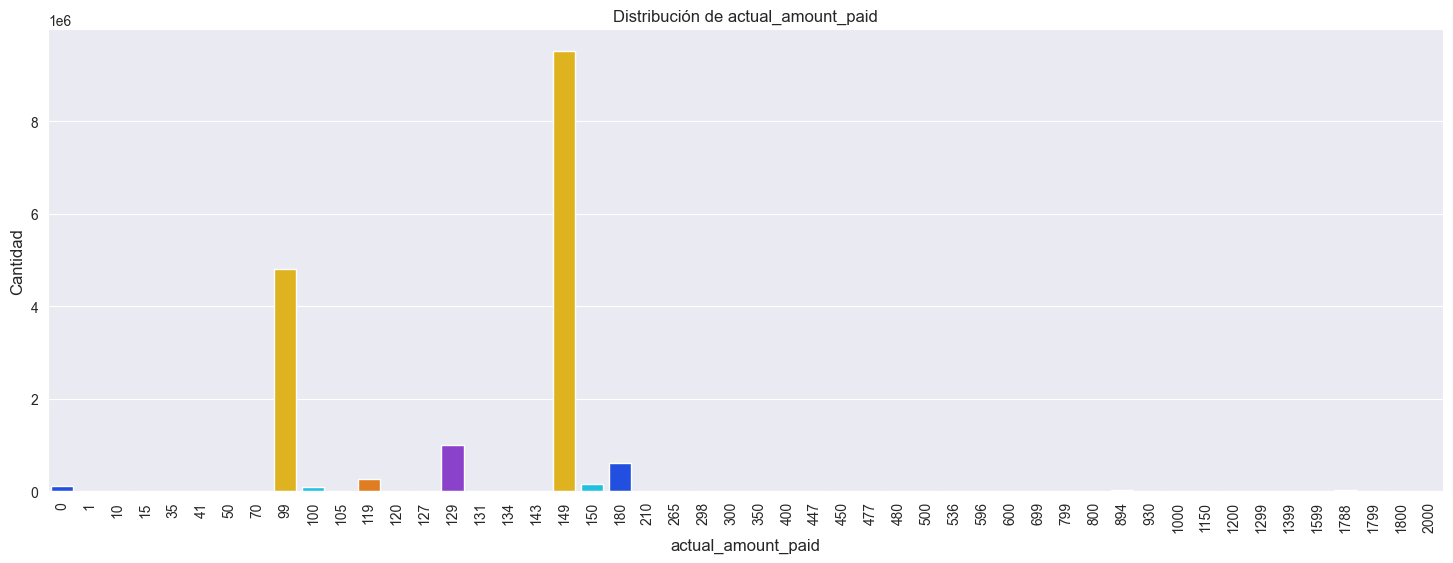

In [22]:
# actual_amount_paid count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="actual_amount_paid", data=transactions, hue="actual_amount_paid", legend=False, palette="bright")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('actual_amount_paid', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de actual_amount_paid", fontsize=12)
plt.show()

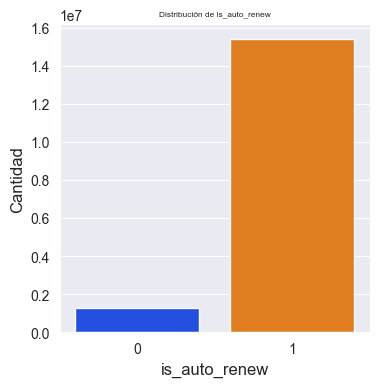

In [23]:
# is_auto_renew count in transactions Data Set
plt.figure(figsize=(4,4))
sns.countplot(x="is_auto_renew", data=transactions, hue="is_auto_renew", legend=False, palette="bright")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('is_auto_renew', fontsize=12)
plt.title("Distribución de is_auto_renew", fontsize=6)
plt.show()

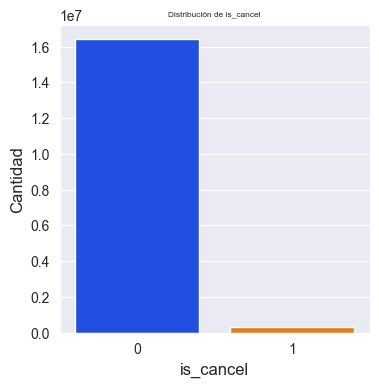

In [24]:
# is_cancel count in transactions Data Set
plt.figure(figsize=(4,4))
sns.countplot(x="is_cancel", data=transactions, hue="is_cancel", legend=False, palette="bright")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('is_cancel', fontsize=12)
plt.title("Distribución de is_cancel", fontsize=6)
plt.show()

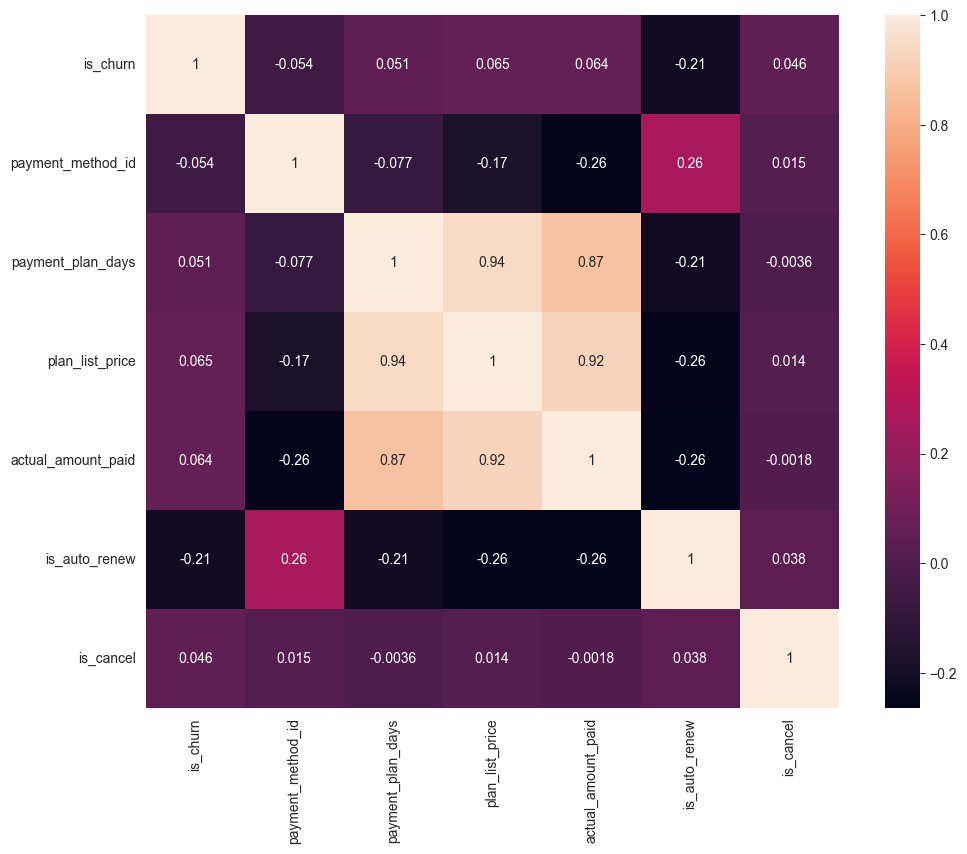

In [25]:
corrmat = transactions.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cbar=True, annot=True, square=True);
plt.show()

In [26]:
ee = transactions.duplicated().sum()


In [27]:
print(ee)

0
